In [8]:
from dependencies import *

## 2.1 Data Manipulation

### 2.1.3 Operations

In [9]:
# Concatenation
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

### 2.1.4 Broadcasting

Under certain conditions, even when shapes differ, we can still perform elementwise binary operations by invoking the broadcasting mechanism. Broadcasting works according to the following two-step procedure: (i) expand one or both arrays by copying elements along axes with length 1 so that after this transformation, the two tensors have the same shape; (ii) perform an elementwise operation on the resulting arrays.

In [10]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [12]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.5 Saving Memory

In [13]:
# This operation doesn't happen in place
before = id(Y)
Y = Y + X
id(Y) == before

False

In [14]:
# This operation happens in place
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 2185442244784
id(Z): 2185442244784


In [15]:
# This also happens in place
before = id(X)
X += Y
id(X) == before

True

## 2.3 Linear Algebra

2.3.5 Basic Properties of Tensor Arithmetic

In [16]:
# Addition
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [18]:
# Elementwise multiplication (Hadamard product)
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [19]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [22]:
# "Reducing" a tensor on a particular axis
A.shape, A.sum(axis=0).shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([3]), torch.Size([2]))

In [24]:
A.sum(axis=[0, 1]) == A.sum()  # Same as A.sum()

tensor(True)

In [25]:
# Calculate the mean
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

### 2.3.8. Dot Products

In [28]:
x = torch.arange(3, dtype=torch.float32)
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

### 2.3.9. Matrix–Vector Products

In [29]:
A, x

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([0., 1., 2.]))

In [30]:
# Matrix-vector products
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

2.3.10. Matrix–Matrix Multiplication

In [31]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

2.3.11 Norms

In [33]:
# Euclidean norm aka L2 norm
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [34]:
# Manhattan norm aka L1 norm
torch.abs(u).sum()

tensor(7.)

Note: Both the L1 and L2 norms are special cases of the more general LP norms

In [35]:
# Frobenius norm: square root of the sum of the squares of the elements
torch.norm(torch.ones((4, 9)))

tensor(6.)

## 2.4 Calculus

In [44]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

### 2.4.1 Derivatives and Differentiation

In [41]:
def poop(): #@save
    print('poop')

In [45]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):  
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [47]:
def f(x):
    return 3 * x ** 2 - 4 * x

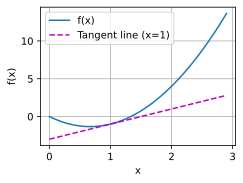

In [48]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

Review gradients and chain rule if unclear

## 2.5 Automatic Differentiation

### 2.5.1 A Simple Function

In [49]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

Note that the gradient of a scalar-valued function with respect to a vector x is vector-valued with the same shape as x.

In [50]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [51]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [52]:
# We can now take the gradient of y with respect to x by calling its backward method
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [70]:
# We know that the gradient of the function y = 2x^2 with respect to x is 4x
x.grad == 4 * x

tensor([True, True, True, True])

In [83]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [69]:
# Personal note
temp = torch.tensor([4], dtype=torch.float32)
temp.requires_grad_(True)
temp[0] = 1

RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.

### 2.5.2. Backward for Non-Scalar Variables

In [89]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

Note: I'm not 100% on why this is

### 2.5.3 Detaching Computation

The following toy example makes this clearer: suppose we have z = x * y and y = x * x but we want to focus on the direct influence of x on z rather than the influence conveyed via y. In this case, we can create a new variable u that takes the same value as y but whose provenance (how it was created) has been wiped out. Thus u has no ancestors in the graph and gradients do not flow through u to x. 

In [91]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

Note that while this procedure detaches y’s ancestors from the graph leading to z, the computational graph leading to y persists and thus we can calculate the gradient of y with respect to x.

In [92]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 2.5.4. Gradients and Python Control Flow

One benefit of using automatic differentiation is that even if building the computational graph of a function required passing through a maze of Python control flow (e.g., conditionals, loops, and arbitrary function calls), we can still calculate the gradient of the resulting variable.

In [93]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [99]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a, a.grad

(tensor(0.9204, requires_grad=True), tensor(2048.))

In [98]:
a.grad == d / a

tensor(True)

For now, try to remember these basics: (i) attach gradients to those variables with respect to which we desire derivatives; (ii) record the computation of the target value; (iii) execute the backpropagation function; and (iv) access the resulting gradient.

## 2.6 Probability and Statistics

In [1]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

### 2.6.1 A Simple Example: Tossing Coins

More generally, we can simulate multiple draws from any variable with a finite number of possible outcomes (like the toss of a coin or roll of a die) by calling the multinomial function, setting the first argument to the number of draws and the second as a list of probabilities associated with each of the possible outcomes.

In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([45., 55.])

Let’s get some more intuition by studying how our estimate evolves as we grow the number of tosses from 1 to 10,000.

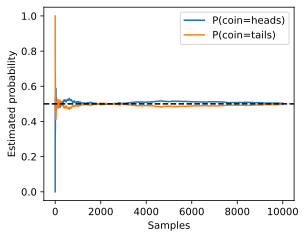

In [4]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

### 2.6.5 Multiple Random Variables Example

Very cool example about conditional independence/dependence and Bayes' Theorem

### 2.6.6 Expectations

Definition of covariance matrix that I understand but not in great theoretical detail.

## 2.7 Documentation

In [5]:
import torch

### 2.7.1 Functions and Classes in a Module

In [7]:
dir(torch.distributions)

['AbsTransform',
 'AffineTransform',
 'Bernoulli',
 'Beta',
 'Binomial',
 'CatTransform',
 'Categorical',
 'Cauchy',
 'Chi2',
 'ComposeTransform',
 'ContinuousBernoulli',
 'CorrCholeskyTransform',
 'CumulativeDistributionTransform',
 'Dirichlet',
 'Distribution',
 'ExpTransform',
 'Exponential',
 'ExponentialFamily',
 'FisherSnedecor',
 'Gamma',
 'Geometric',
 'Gumbel',
 'HalfCauchy',
 'HalfNormal',
 'Independent',
 'IndependentTransform',
 'Kumaraswamy',
 'LKJCholesky',
 'Laplace',
 'LogNormal',
 'LogisticNormal',
 'LowRankMultivariateNormal',
 'LowerCholeskyTransform',
 'MixtureSameFamily',
 'Multinomial',
 'MultivariateNormal',
 'NegativeBinomial',
 'Normal',
 'OneHotCategorical',
 'OneHotCategoricalStraightThrough',
 'Pareto',
 'Poisson',
 'PositiveDefiniteTransform',
 'PowerTransform',
 'RelaxedBernoulli',
 'RelaxedOneHotCategorical',
 'ReshapeTransform',
 'SigmoidTransform',
 'SoftmaxTransform',
 'SoftplusTransform',
 'StackTransform',
 'StickBreakingTransform',
 'StudentT',
 'Ta

### 2.7.2. Specific Functions and Classes

In [8]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

In [16]:
torch.ones?

Docstring:
ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `1`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword arguments:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_tensor_type`). :attr:`